In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gp
import numpy as np
import os
import json

PARQA = os.getenv('PARQA')

In [2]:
pg = gp.read_file(PARQA + 'data/DPR_SchoolyardsToPlaygrounds_001/DPR_SchoolyardsToPlaygrounds_001.shp')

/Users/casy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


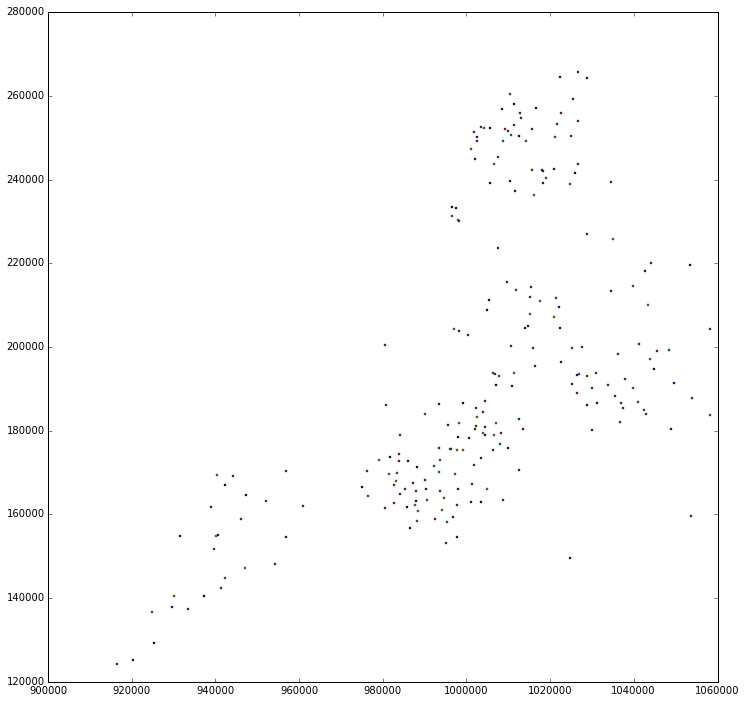

In [3]:
pg2 = pg[['BOROUGH','LOCATION','EAPPLY','GISPROPNUM','geometry']]
pg2['geometry'] = pg2.geometry.centroid
pg2.plot(figsize=(12,12));

In [4]:
with open(PARQA + 'data/school_playgrounds.json', 'w') as rfile:
    json.dump(pg2.to_json(), rfile)


In [5]:
pg2 = pg2.replace('Null', np.nan)

In [6]:
pg3 = pg2[pd.notnull(pg2['EAPPLY'])].rename(columns={'EAPPLY':'PSID'})
pg3[['BOROUGH', 'LOCATION','PSID', 'GISPROPNUM']].to_csv(PARQA + 'data/sch_playground_names.csv')

In [11]:
p = pg3.to_crs(epsg=4326)

p['lon'] = p.geometry.apply(lambda x: x.coords[0][0])
p['lat'] = p.geometry.apply(lambda x: x.coords[0][1])
p = p.drop(['geometry'],1)
p.head()

,BOROUGH,LOCATION,PSID,GISPROPNUM,lon,lat
0,Q,Francis Lewis Blvd. bet.ween 192 St. and 35 Ave.,I.S. 25,QS09,-73.789308,40.765013
1,Q,117 St. bet.ween Jamaica Ave. and 89 Ave.,P.S. 51,QS10,-73.831557,40.698129
2,B,E. 2 St. bet.ween Ave. S and Ave. R,P.S. 215,BS30,-73.970225,40.602868
3,B,60 St. bet.ween Bay Pkwy. and 23 Ave.,P.S. 226,BS31,-73.977325,40.615567
4,B,Bergen St. bet.ween Troy Ave. and Schenectady ...,P.S. 243,BS32,-73.934851,40.675514


In [12]:
p.to_csv(PARQA + 'data/DPR_property/school_playgrounds.csv', encoding='utf8')